In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ped_data = pd.read_csv('../../data/pediatric_patients_report_drug_reaction.csv.gz',compression='gzip', index_col=0)

In [33]:
ped_data.info(
)

<class 'pandas.core.frame.DataFrame'>
Index: 881396 entries, 1 to 1754669
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   patient_custom_master_age       881396 non-null  float64
 1   patient_custom_master_age_unit  881396 non-null  object 
 2   patient_onsetage                881396 non-null  float64
 3   patient_onsetageunit            881396 non-null  object 
 4   patient_sex                     881396 non-null  object 
 5   safetyreportid                  881396 non-null  object 
 6   nichd                           881396 non-null  object 
 7   ich_ema                         639944 non-null  object 
 8   fda                             529859 non-null  object 
 9   lastupdate_date                 881396 non-null  object 
 10  mostrecent_receive_date         881396 non-null  object 
 11  receive_date                    881396 non-null  object 
 12  congenital_anomali  

In [3]:
col = 'patient_custom_master_age'
display(ped_data[col].astype(float).dropna().shape[0])

881396

In [15]:
ped_reports = (ped_data.
               query('patient_custom_master_age>0 & patient_custom_master_age<21').
               safetyreportid.unique()
              )

In [18]:
values = ped_data.groupby('safetyreportid')[col].agg('mean').dropna().values

In [19]:
print(len(values))
print(len(values)/ped_data.shape[0])

113665
0.12896019496344435


In [21]:
import numpy as np
lt_100 = values<100
gt_0 = values>0
num = sum(np.logical_and(gt_0,lt_100))
print(num)
num/len(values)

113665


np.float64(1.0)

In [22]:

lt_18 = values<18
num = sum(np.logical_and(gt_0,lt_18))
print(num)
num/len(values)

81764


np.float64(0.7193419258346897)

In [23]:
gtoeq_18 = values>=18
num = sum(np.logical_and(gtoeq_18,lt_100))
print(num)
num/len(values)

31901


np.float64(0.28065807416531036)

In [24]:
sensical_values = values[np.logical_and(gt_0,lt_100)]

In [25]:
integer_year_counts = np.unique(np.floor(sensical_values),return_counts=True)
integer_year_counts

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21.]),
 array([8519, 4471, 3434, 3089, 3087, 3090, 3513, 3725, 3734, 3853, 4131,
        3819, 4023, 4194, 5200, 5779, 6842, 7261, 7211, 7815, 8605, 8270]))

([<matplotlib.axis.XTick at 0x7f30b2175550>,
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11'),
  Text(12.0, 0, '12'),
  Text(13.0, 0, '13'),
  Text(14.0, 0, '14'),
  Text(15.0, 0, '15'),
  Text(16.0, 0, '16'),
  Text(17.0, 0, '17'),
  Text(18.0, 0, '18'),
  Text(19.0, 0, '19'),
  Text(20.0, 0, '20')])

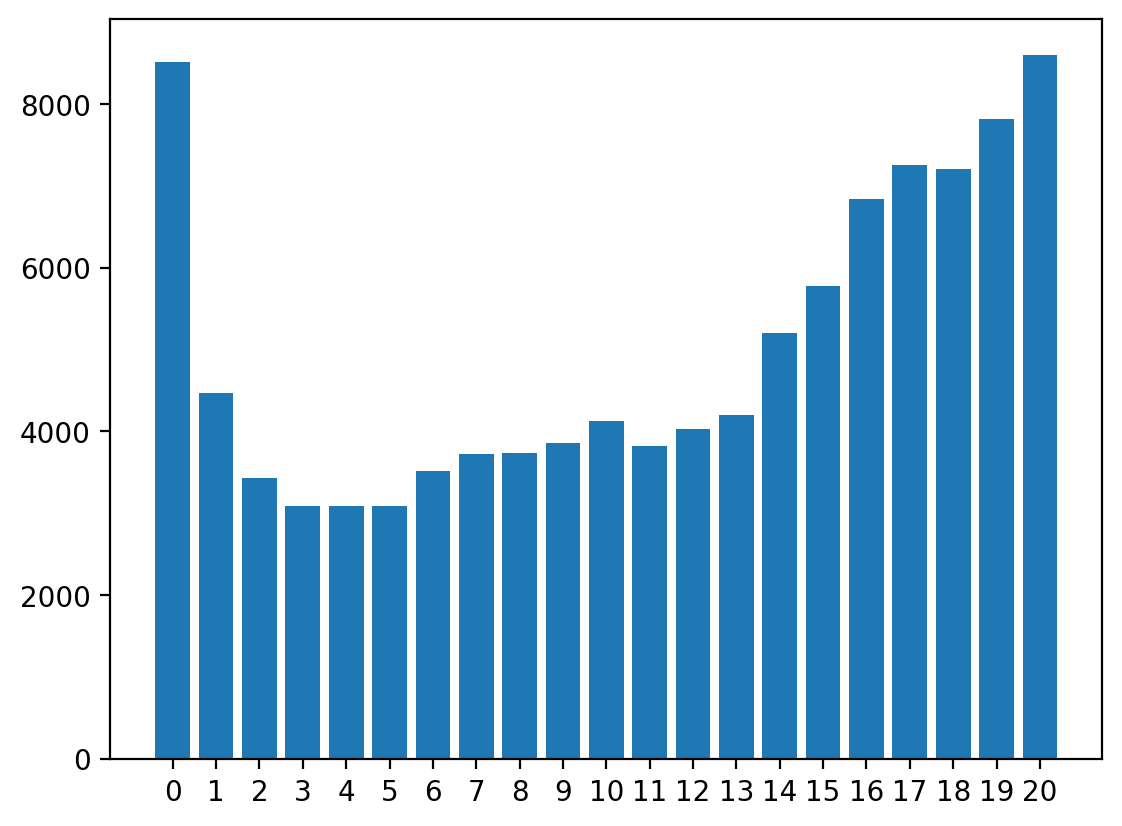

In [26]:
plt.figure(dpi=200)
plt.bar(integer_year_counts[0][:21],integer_year_counts[1][:21])
plt.xticks(integer_year_counts[0][:21])

/tmp/ipykernel_31624/2524760091.py:6: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_pivot = df.pivot_table(index='patient_onsetage',columns='patient_onsetageunit',


patient_onsetage,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
patient_onsetageunit,,,,,,,,,,,,,,,,,,,,
Decade,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Year,0.34,0.75,0.79,0.82,0.83,0.82,0.85,0.84,0.90,0.91,0.91,0.90,0.92,0.94,0.94,0.95,0.97,0.94,0.96,0.95
Month,0.09,0.12,0.16,0.12,0.12,0.15,0.12,0.15,0.09,0.08,0.08,0.08,0.06,0.05,0.05,0.05,0.02,0.06,0.03,0.04
Week,0.00,0.01,0.02,0.02,0.01,0.02,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Day,0.50,0.10,0.04,0.04,0.04,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.01
Hour,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


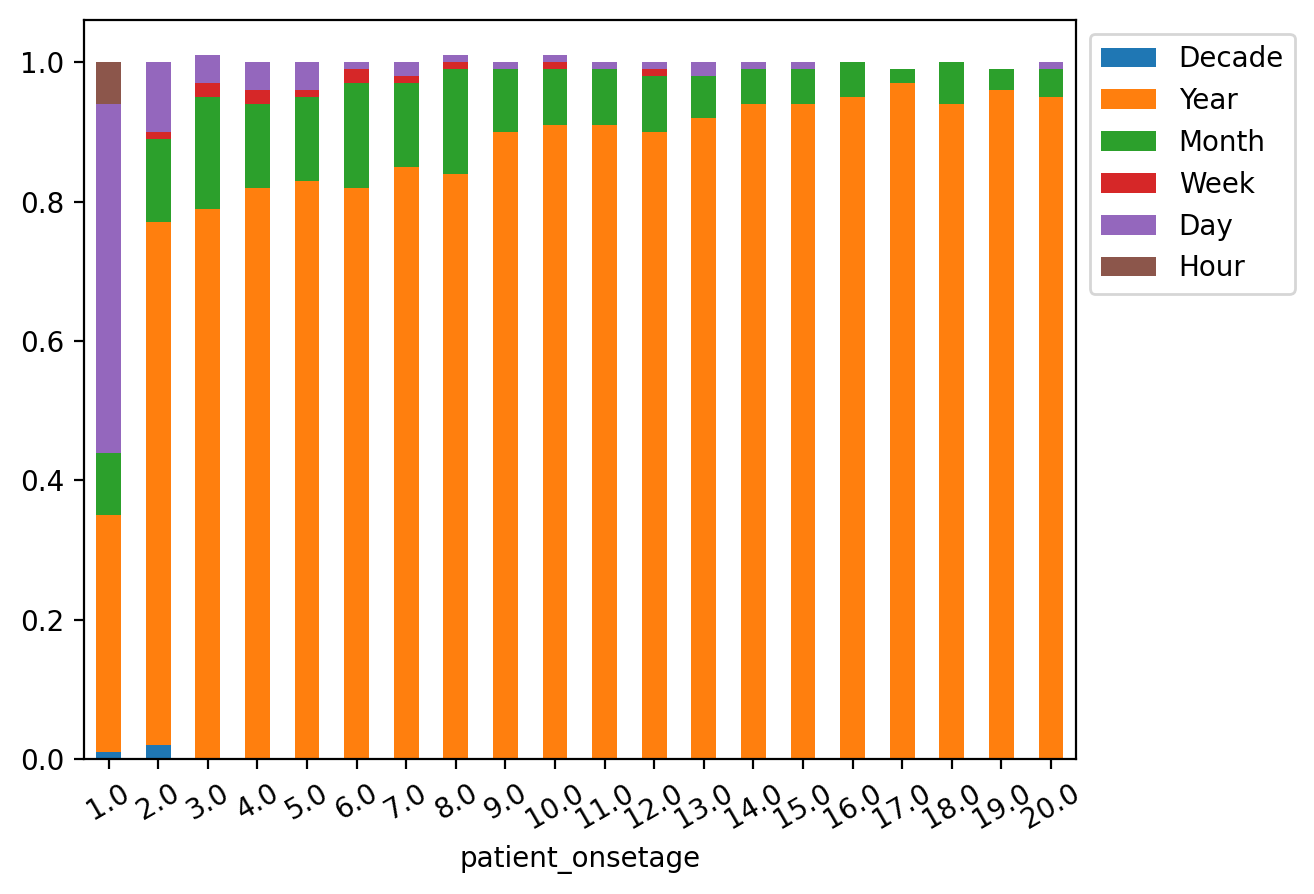

In [28]:
pediatric_patient_df = (ped_data.
                        query('patient_onsetage>0 & patient_onsetage<21'))
df = pediatric_patient_df[['patient_onsetageunit','patient_onsetage']].query('patient_onsetage<21').copy()
df['patient_onsetage'] = np.floor(df['patient_onsetage'])
df['mem'] = 1.
df_pivot = df.pivot_table(index='patient_onsetage',columns='patient_onsetageunit',
                          values='mem',aggfunc=sum,fill_value=0)
order=['Decade','Year','Month','Week','Day','Hour']
df_pivot = df_pivot[order].apply(lambda x : x / sum(x),axis=1).round(2)
display(df_pivot.T)
fig,ax=plt.subplots(dpi=200)
g = df_pivot.plot(kind='bar',stacked=True,ax=ax)
g.legend(bbox_to_anchor=(1,1))
g = g.set_xticklabels(g.get_xticklabels(),rotation=30)

In [4]:
report_serious = pd.read_csv('../../data/openFDA_drug_event/er_tables_memory_efficient/report_serious.csv.gz', compression='gzip')

/tmp/ipykernel_31624/1525902999.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  report_serious = pd.read_csv('../../data/openFDA_drug_event/er_tables_memory_efficient/report_serious.csv.gz', compression='gzip')


In [7]:
report_serious.isna().sum()

congenital_anomali    14130322
death                 12814817
disabling             13901050
life_threatening      13774745
other                  9136830
safetyreportid               0
serious                      0
dtype: int64

In [5]:
report_serious['serious'].unique()

array(['The adverse event resulted in death, a life threatening condition, hospitalization, disability, congenital anomaly, or other serious condition',
       'The adverse event did not result in any of the above'],
      dtype=object)

In [34]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from dask import delayed, compute



data_dir = "../../data/openFDA_drug_event/"

primarykey = 'safetyreportid'

def read_file(file):
    return pd.read_csv(file,compression='gzip',index_col=0,dtype={primarykey : 'str'})

dir_ = data_dir+'report/'
files = glob.glob(dir_+'*.csv.gzip')
results = []
for file in files:
    df = delayed(read_file)(file)
    results.append(df)
report_df = (pd.concat(compute(*results),sort=True))
report_df[primarykey] = (report_df[primarykey].astype(str))
print(report_df.columns.values)
report_df.head()

['authoritynumb' 'companynumb' 'duplicate' 'fulfillexpeditecriteria'
 'occurcountry' 'primarysource' 'primarysource.literaturereference'
 'primarysource.qualification' 'primarysource.reportercountry'
 'primarysourcecountry' 'receiptdate' 'receiptdateformat' 'receivedate'
 'receivedateformat' 'receiver' 'receiver.receiverorganization'
 'receiver.receivertype' 'reportduplicate' 'reportduplicate.duplicatenumb'
 'reportduplicate.duplicatesource' 'reporttype' 'safetyreportid'
 'safetyreportversion' 'sender.senderorganization' 'sender.sendertype'
 'serious' 'seriousnesscongenitalanomali' 'seriousnessdeath'
 'seriousnessdisabling' 'seriousnesshospitalization'
 'seriousnesslifethreatening' 'seriousnessother' 'transmissiondate'
 'transmissiondateformat']


,authoritynumb,companynumb,duplicate,fulfillexpeditecriteria,occurcountry,primarysource,primarysource.literaturereference,primarysource.qualification,primarysource.reportercountry,primarysourcecountry,...,sender.sendertype,serious,seriousnesscongenitalanomali,seriousnessdeath,seriousnessdisabling,seriousnesshospitalization,seriousnesslifethreatening,seriousnessother,transmissiondate,transmissiondateformat
0,NaN,AU-ROCHE-3108574,NaN,True,AU,NaN,NaN,Consumer or non-health professional,AU,AU,...,1.0,The adverse event did not result in any of the...,NaN,NaN,NaN,NaN,NaN,NaN,20250115,102
1,NaN,PH-SUN PHARMACEUTICAL INDUSTRIES LTD-2024R1-47...,NaN,True,PH,NaN,Mesina FZ. Severe Relapsed Autoimmune Hemolyti...,Other health professional,PH,PH,...,1.0,"The adverse event resulted in death, a life th...",2.0,2.0,2.0,1.0,2.0,2.0,20250115,102
2,NaN,US-NOVARTISTESTPH-NVSC2022US139252,NaN,False,US,NaN,NaN,Consumer or non-health professional,US,US,...,1.0,The adverse event did not result in any of the...,2.0,2.0,2.0,2.0,2.0,2.0,20250115,102
3,NaN,CA-CELLTRION INC.-2023CA025283,1.0,True,CA,NaN,NaN,Other health professional,CA,CA,...,1.0,"The adverse event resulted in death, a life th...",2.0,2.0,2.0,2.0,2.0,1.0,20250115,102
4,NaN,US-OPELLA-2024OHG040973,NaN,False,US,NaN,NaN,Consumer or non-health professional,US,US,...,1.0,The adverse event did not result in any of the...,NaN,NaN,NaN,NaN,NaN,NaN,20250115,102


In [35]:
# 25129802
report_df.loc[report_df['safetyreportid']=='25129802']

,authoritynumb,companynumb,duplicate,fulfillexpeditecriteria,occurcountry,primarysource,primarysource.literaturereference,primarysource.qualification,primarysource.reportercountry,primarysourcecountry,...,sender.sendertype,serious,seriousnesscongenitalanomali,seriousnessdeath,seriousnessdisabling,seriousnesshospitalization,seriousnesslifethreatening,seriousnessother,transmissiondate,transmissiondateformat
2600,NaN,VN-ROCHE-10000240781,NaN,True,VN,NaN,NaN,Physician,VN,VN,...,6.0,"The adverse event resulted in death, a life th...",NaN,NaN,NaN,1.0,NaN,NaN,20250409,102


In [3]:
ped_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881396 entries, 1 to 1754669
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   patient_custom_master_age       881396 non-null  float64
 1   patient_custom_master_age_unit  881396 non-null  object 
 2   patient_onsetage                881396 non-null  float64
 3   patient_onsetageunit            881396 non-null  object 
 4   patient_sex                     881396 non-null  object 
 5   safetyreportid                  881396 non-null  object 
 6   nichd                           881396 non-null  object 
 7   ich_ema                         639944 non-null  object 
 8   fda                             529859 non-null  object 
 9   lastupdate_date                 881396 non-null  object 
 10  mostrecent_receive_date         881396 non-null  object 
 11  receive_date                    881396 non-null  object 
 12  congenital_anomali  

In [4]:
# unique_drugs_per_report = ped_data.groupby('safetyreportid')['medicinal_product'].nunique().reset_index()
# unique_drugs_per_report.columns = ['safetyreportid', 'unique_drug_count']

In [5]:
# unique_drugs_per_report.sort_values(by='unique_drug_count', ascending=True)

In [6]:
unique_safetyreportid = ped_data['safetyreportid'].nunique()
duplicate_safetyreportid = ped_data['safetyreportid'].duplicated().sum()


print(f'จำนวนรายงานที่ไม่มีการซ้ำกันคือ {unique_safetyreportid:,} รายงาน')
print(f'จำนวนรายงานที่มีการซ้ำกันคือ {duplicate_safetyreportid:,} รายงาน')
print(f'จำนวนรายงานทั้งหมดคือ {unique_safetyreportid + duplicate_safetyreportid:,} รายงาน จะเท่ากับข้อมูลต้นฉบับ {len(ped_data):,} รายงาน')

จำนวนรายงานที่ไม่มีการซ้ำกันคือ 113,665 รายงาน
จำนวนรายงานที่มีการซ้ำกันคือ 767,731 รายงาน
จำนวนรายงานทั้งหมดคือ 881,396 รายงาน จะเท่ากับข้อมูลต้นฉบับ 881,396 รายงาน


In [21]:
drug_unique = ped_data['medicinal_product'].nunique()
reaction_unique = ped_data['reaction_meddrapt'].nunique()
print(f'จำนวนยาที่ไม่ซ้ำกันทั้งหมด: {drug_unique:,} รายการ')
print(f'จำนวนอาการที่ไม่ซ้ำกันทั้งหมด: {reaction_unique:,} รายการ')

จำนวนยาที่ไม่ซ้ำกันทั้งหมด: 16,536 รายการ
จำนวนอาการที่ไม่ซ้ำกันทั้งหมด: 12,231 รายการ


In [32]:
ped_data['drug_indication'].nunique()

4501

In [ ]:
# จำนวน reaction ที่แต่ละยาเกิดขึ้น
drug_reaction_count = ped_data.groupby('medicinal_product')['reaction_meddrapt'].nunique().reset_index()
drug_reaction_count.columns = ['medicinal_product', 'num_unique_reactions']
drug_reaction_count.sort_values(by='num_unique_reactions', ascending=False)

,medicinal_product,num_unique_reactions
9776,METHOTREXATE,2424
4405,CYCLOSPORINE,1949
4385,CYCLOPHOSPHAMIDE,1918
201,ACCUTANE,1741
12387,PREDNISOLONE,1684
...,...,...
14454,TAMSULOSIN DURA,1
14445,TALVOSILEN,1
14443,TALOXA ORAL SUSPENSION (FELBAMATE),1
14436,TALINOLOL,1


In [27]:
# จำนวน ยา ที่มี reaction
drug_reaction_count = ped_data.groupby('reaction_meddrapt')['medicinal_product'].nunique().reset_index()
drug_reaction_count.columns = ['reaction_meddrapt', 'num_unique_drugs']
drug_reaction_count.sort_values(by='num_unique_drugs', ascending=False)

,reaction_meddrapt,num_unique_drugs
9326,PYREXIA,2575
12001,VOMITING,2561
2649,CONVULSION,2038
7744,NAUSEA,1820
3425,DRUG INEFFECTIVE,1727
...,...,...
8757,PHYSICAL PRODUCT LABEL ISSUE,1
20,ABDOMINAL OPERATION,1
1511,BONE ABSCESS,1
12223,YERSINIA INFECTION,1


## Standard 

In [7]:
concept = (pd.read_csv('../../data/openFDA_drug_event/vocabulary_download_v5/CONCEPT.csv',sep='\t',
                      dtype={
                          'concept_id' : 'int'
                      }))
concept.head()

/tmp/ipykernel_26328/1850678616.py:1: DtypeWarning: Columns (5,6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  concept = (pd.read_csv('../../data/openFDA_drug_event/vocabulary_download_v5/CONCEPT.csv',sep='\t',


,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason
0,45756805,Pediatric Cardiology,Provider,ABMS,Physician Specialty,S,OMOP4821938,19700101,20991231,NaN
1,45756804,Pediatric Anesthesiology,Provider,ABMS,Physician Specialty,S,OMOP4821939,19700101,20991231,NaN
2,45756803,Pathology-Anatomic / Pathology-Clinical,Provider,ABMS,Physician Specialty,S,OMOP4821940,19700101,20991231,NaN
3,45756802,Pathology - Pediatric,Provider,ABMS,Physician Specialty,S,OMOP4821941,19700101,20991231,NaN
4,45756801,Pathology - Molecular Genetic,Provider,ABMS,Physician Specialty,S,OMOP4821942,19700101,20991231,NaN


In [8]:
concept_relationship = (pd.
                        read_csv('../../data/openFDA_drug_event/vocabulary_download_v5/'+
                                 'CONCEPT_RELATIONSHIP.csv',sep='\t',
                                dtype={
                                    'concept_id_1' : 'int',
                                    'concept_id_2' : 'int'
                                }))
concept_relationship.head()

,concept_id_1,concept_id_2,relationship_id,valid_start_date,valid_end_date,invalid_reason
0,21014172,21034689,RxNorm dose form of,20150817,20991231,NaN
1,21014172,21044546,RxNorm dose form of,20150817,20991231,NaN
2,21014172,21054337,RxNorm dose form of,20150817,20991231,NaN
3,21014172,21064199,RxNorm dose form of,20150817,20991231,NaN
4,21014172,21095576,RxNorm dose form of,20150817,20991231,NaN


In [10]:

data_dir = "../../data/openFDA_drug_event/"
er_dir = data_dir+'er_tables_memory_efficient/'

In [11]:
drugs = (pd.read_csv(
    er_dir+'drugs.csv.gz',
    compression='gzip',
    dtype={
        'safetyreportid' : 'str'
    }
)
        )

In [12]:
drugs

,rxcui,safetyreportid
0,197807,10003301
1,854183,10003301
2,731533,10003301
3,544393,10003301
4,206878,10003301
...,...,...
433861421,722124,9999998
433861422,722116,9999999
433861423,722124,9999999
433861424,722122,9999999


In [16]:
print("--- ขั้นตอนที่ 1: กำลังทำ Standard MedDRA ---")

# 1.1 เตรียมข้อมูล MedDRA Preferred Term (PT) จากตาราง CONCEPT
print("กำลังเตรียม MedDRA concepts...")
meddra_concepts = concept.query("vocabulary_id == 'MedDRA' and concept_class_id == 'PT'").copy()

# Normalizing ชื่ออาการให้เป็น Title Case เพื่อให้ join ได้ง่ายขึ้น
meddra_concepts['concept_name_normalized'] = meddra_concepts['concept_name'].str.title()

# เลือกและเปลี่ยนชื่อคอลัมน์เพื่อป้องกันการซ้ำซ้อน
meddra_for_join = meddra_concepts[[
    'concept_id', 'concept_name_normalized', 'concept_code'
]].rename(columns={
    'concept_id': 'MedDRA_concept_id',
    'concept_name_normalized': 'MedDRA_concept_name',
    'concept_code': 'MedDRA_concept_code'
})

# 1.2 เตรียมข้อมูลในตารางหลัก
# สร้างคอลัมน์ชั่วคราวสำหรับ join
ped_data['reaction_meddrapt_normalized'] = ped_data['reaction_meddrapt'].str.title()

# 1.3 ทำการ Merge (Join)
print("กำลังเชื่อมโยงข้อมูลอาการกับ MedDRA ID...")
ped_data_with_meddra = pd.merge(
    ped_data,
    meddra_for_join,
    left_on='reaction_meddrapt_normalized',
    right_on='MedDRA_concept_name',
    how='left'  # <<-- ใช้ 'left' join เพื่อเก็บข้อมูลเด็กทั้งหมดไว้
)

# 1.4 ทำความสะอาดข้อมูลหลัง Merge
ped_data_with_meddra = ped_data_with_meddra.drop(columns=['reaction_meddrapt_normalized', 'MedDRA_concept_name'])

print("\nการเชื่อมโยง MedDRA เสร็จสิ้น!")
# ตรวจสอบผลลัพธ์
meddra_mapped_count = ped_data_with_meddra['MedDRA_concept_id'].notna().sum()
total_records = len(ped_data_with_meddra)
print(f"จำนวน records ทั้งหมด: {total_records}")
print(f"จำนวน records ที่เชื่อม MedDRA ID ได้: {meddra_mapped_count} ({meddra_mapped_count/total_records:.2%})")

print("\nตัวอย่างข้อมูลหลังเพิ่ม MedDRA:")
print(ped_data_with_meddra[['safetyreportid', 'reaction_meddrapt', 'MedDRA_concept_id']].head())

--- ขั้นตอนที่ 1: กำลังทำ Standard MedDRA ---
กำลังเตรียม MedDRA concepts...


กำลังเชื่อมโยงข้อมูลอาการกับ MedDRA ID...

การเชื่อมโยง MedDRA เสร็จสิ้น!
จำนวน records ทั้งหมด: 881396
จำนวน records ที่เชื่อม MedDRA ID ได้: 811930 (92.12%)

ตัวอย่างข้อมูลหลังเพิ่ม MedDRA:
  safetyreportid          reaction_meddrapt  MedDRA_concept_id
0       25129349  Bundle branch block right         35204912.0
1       25129349  Bundle branch block right         35204912.0
2       25129367          Treatment failure         35809361.0
3       25129367          Treatment failure         35809361.0
4       25129367          Treatment failure         35809361.0


In [24]:
er_dir = '../../data/openFDA_drug_event/er_tables_memory_efficient/'

print("\n--- ขั้นตอนที่ 2 (ฉบับแก้ไข KeyError ครั้งสุดท้าย): กำลังทำ Standard ATC ผ่าน Ingredient ---")

# --- ส่วน A: สร้างตารางเชื่อมโยงที่จำเป็นขึ้นมาใหม่ (ส่วนนี้ถูกต้องแล้ว) ---
# (นำโค้ดส่วน A จากคำตอบก่อนหน้ามาวางที่นี่ได้เลย หรือรันส่วนด้านล่างนี้)

print("A.1: กำลังสร้างตาราง Product-to-Ingredient map...")
has_ingredient_rels = concept_relationship.query("relationship_id in ['Has precise ing', 'Has ingredient']").copy()
rx_products = concept.query("vocabulary_id == 'RxNorm' and concept_class_id not in ['Ingredient', 'Brand Name']").copy()
rx_ingredients = concept.query("vocabulary_id == 'RxNorm' and concept_class_id == 'Ingredient'").copy()

product_to_ingredient_map = pd.merge(
    has_ingredient_rels,
    rx_products[['concept_id']].add_prefix('product_'),
    left_on='concept_id_1',
    right_on='product_concept_id'
)
product_to_ingredient_map = pd.merge(
    product_to_ingredient_map,
    rx_ingredients[['concept_id', 'concept_name']].add_prefix('ingredient_'),
    left_on='concept_id_2',
    right_on='ingredient_concept_id'
)
product_to_ingredient_map = product_to_ingredient_map[['product_concept_id', 'ingredient_concept_id', 'ingredient_concept_name']].drop_duplicates()
product_to_ingredient_map = product_to_ingredient_map.rename(columns={'ingredient_concept_name': 'ingredient_name'})
print(f"สร้าง Product-to-Ingredient map สำเร็จ")

print("A.2: กำลังสร้างตาราง Ingredient-to-ATC map...")
atc_concepts = concept.query("vocabulary_id == 'ATC' and concept_class_id == 'ATC 5th'").copy()
atc_for_join = atc_concepts[['concept_id', 'concept_code', 'concept_name']].rename(columns={
    'concept_id': 'ATC_concept_id', 'concept_code': 'ATC_concept_code', 'concept_name': 'ATC_concept_name'
})
rx_ingredients_for_join = rx_ingredients[['concept_id', 'concept_name']].rename(columns={
    'concept_id': 'ingredient_concept_id', 'concept_name': 'ingredient_name'
})
maps_to_relations = concept_relationship.query("relationship_id == 'Maps to' and invalid_reason != 'U'").copy()

ingredient_to_atc_map = pd.merge(maps_to_relations, atc_for_join, left_on='concept_id_2', right_on='ATC_concept_id')
ingredient_to_atc_map = pd.merge(ingredient_to_atc_map, rx_ingredients_for_join, left_on='concept_id_1', right_on='ingredient_concept_id')
ingredient_to_atc_map = ingredient_to_atc_map[['ingredient_concept_id', 'ingredient_name', 'ATC_concept_id', 'ATC_concept_code', 'ATC_concept_name']].drop_duplicates()
print(f"สร้าง Ingredient-to-ATC map สำเร็จ")


# --- ส่วน B: เชื่อมโยงข้อมูลทั้งหมดเข้าด้วยกัน (ส่วนที่แก้ไขอย่างละเอียด) ---
print("\nB.1: กำลังเชื่อมโยงข้อมูลยา -> RxNorm -> Ingredient -> ATC...")

# B.1.1: โหลด standard_drugs และกรองเฉพาะข้อมูลเด็ก
standard_drugs = pd.read_csv(
    er_dir + 'standard_drugs.csv.gz',
    compression='gzip',
    dtype={'safetyreportid': 'str', 'RxNorm_concept_id': 'int'}
)
ped_reports = ped_data_with_meddra['safetyreportid'].unique()
pediatric_standard_drugs = standard_drugs[standard_drugs['safetyreportid'].isin(ped_reports)].copy()

# B.1.2: Merge ตารางหลักกับ RxNorm Product ID (*** จุดที่แก้ไข ***)
# สร้าง join key จากชื่อยาในแต่ละตาราง
ped_data_with_meddra['join_drug_name'] = ped_data_with_meddra['medicinal_product'].str.lower()
pediatric_standard_drugs['join_drug_name'] = pediatric_standard_drugs['RxNorm_concept_name'].str.lower()

final_dataset = pd.merge(
    ped_data_with_meddra,
    pediatric_standard_drugs.rename(columns={'RxNorm_concept_id': 'RxNorm_product_id'}),
    on=['safetyreportid', 'join_drug_name'], # <-- Join ด้วย safetyreportid และชื่อยาที่แปลงแล้ว
    how='left'
)

# B.1.3: Merge กับ Product-to-Ingredient Map
final_dataset = pd.merge(
    final_dataset,
    product_to_ingredient_map,
    left_on='RxNorm_product_id',
    right_on='product_concept_id',
    how='left'
)

# B.1.4: Merge กับ Ingredient-to-ATC Map
final_dataset = pd.merge(
    final_dataset,
    ingredient_to_atc_map,
    on='ingredient_concept_id',
    how='left',
    suffixes=('', '_from_atc_map')
)

# B.1.5: ทำความสะอาดข้อมูล
# ลบคอลัมน์ที่ไม่จำเป็นและจัดการคอลัมน์ที่ซ้ำซ้อน
cols_to_drop = [
    'join_drug_name', 'RxNorm_product_id', 'product_concept_id',
    'ingredient_name_from_atc_map', 'RxNorm_concept_code',
    'RxNorm_concept_name', 'RxNorm_concept_class_id'
]
final_dataset = final_dataset.drop(columns=[col for col in cols_to_drop if col in final_dataset.columns], errors='ignore')
final_dataset.drop_duplicates(inplace=True)


print("\nการเชื่อมโยง ATC เสร็จสิ้น!")
atc_mapped_count = final_dataset['ATC_concept_id'].notna().sum()
total_records_final = len(final_dataset)
print(f"จำนวน records ทั้งหมดในตารางสุดท้าย: {total_records_final}")
print(f"จำนวน records ที่เชื่อม ATC ID ได้: {atc_mapped_count} (คิดเป็นประมาณ {atc_mapped_count/total_records_final:.2%})")

print("\nตัวอย่างข้อมูลสุดท้าย:")
print(final_dataset[[
    'safetyreportid', 'medicinal_product', 'reaction_meddrapt',
    'MedDRA_concept_id', 'ingredient_name', 'ATC_concept_name'
]].dropna(subset=['ATC_concept_name']).head(10))


--- ขั้นตอนที่ 2 (ฉบับแก้ไข KeyError ครั้งสุดท้าย): กำลังทำ Standard ATC ผ่าน Ingredient ---
A.1: กำลังสร้างตาราง Product-to-Ingredient map...
สร้าง Product-to-Ingredient map สำเร็จ
A.2: กำลังสร้างตาราง Ingredient-to-ATC map...
สร้าง Ingredient-to-ATC map สำเร็จ

B.1: กำลังเชื่อมโยงข้อมูลยา -> RxNorm -> Ingredient -> ATC...

การเชื่อมโยง ATC เสร็จสิ้น!
จำนวน records ทั้งหมดในตารางสุดท้าย: 881324
จำนวน records ที่เชื่อม ATC ID ได้: 0 (คิดเป็นประมาณ 0.00%)

ตัวอย่างข้อมูลสุดท้าย:
Empty DataFrame
Columns: [safetyreportid, medicinal_product, reaction_meddrapt, MedDRA_concept_id, ingredient_name, ATC_concept_name]
Index: []
